## SED templates used in Redrock

In [1]:
import fitsio
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%pylab inline
import collections

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['font.size'] = 20

In [3]:
froot = '/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/code/redrock-templates/0.7/'

In [4]:
# some emission lines
eml_colors = collections.OrderedDict({'OII-d1':'tab:blue', 'OII-d2':'tab:blue',
                                      'OIII-d1':'tab:orange', 'OIII-d2':'tab:orange',
                                      'H-alpha':'tab:green', 'H-beta':'tab:brown'})
emls = collections.OrderedDict({'OII-d1':3726, 'OII-d2':3729,
                                'OIII-d1':4959, 'OIII-d2':5007,
                                'H-alpha':6563, 'H-beta':4861})

---

- Some steps are following redrock.templates.Templates.

### Galaxy

In [5]:
fx = fits.open(froot + 'rrtemplate-galaxy.fits')

In [6]:
fx.info()

Filename: /global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/code/redrock-templates/0.7/rrtemplate-galaxy.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  BASIS_VECTORS    1 PrimaryHDU      15   (97720, 10)   float64   
  1  ARCHETYPE_COEFF    1 ImageHDU         8   (10, 20000)   float64   


In [7]:
hdr = fx['BASIS_VECTORS'].header
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                97720                                                  
NAXIS2  =                   10                                                  
EXTEND  =                    T                                                  
CRVAL1  =    1228.070175438596 / restframe starting wavelength [Angstroms]      
CDELT1  =                  0.1                                                  
RRTYPE  = 'GALAXY  '                                                            
RRSUBTYP= ''                                                                    
RRVER   = '0.13.0.dev529'                                                       
VERSION = '2.6     '           / Template version                               
INSPEC  = '/scratch1/scratch

In [8]:
wave = np.asarray(hdr['CRVAL1'] + hdr['CDELT1']*np.arange(hdr['NAXIS1']), dtype=np.float64)
wave.shape

(97720,)

In [9]:
from redrock.utils import native_endian
bv = np.asarray(native_endian(fx['BASIS_VECTORS'].data), dtype=np.float64)
bv.shape

(10, 97720)

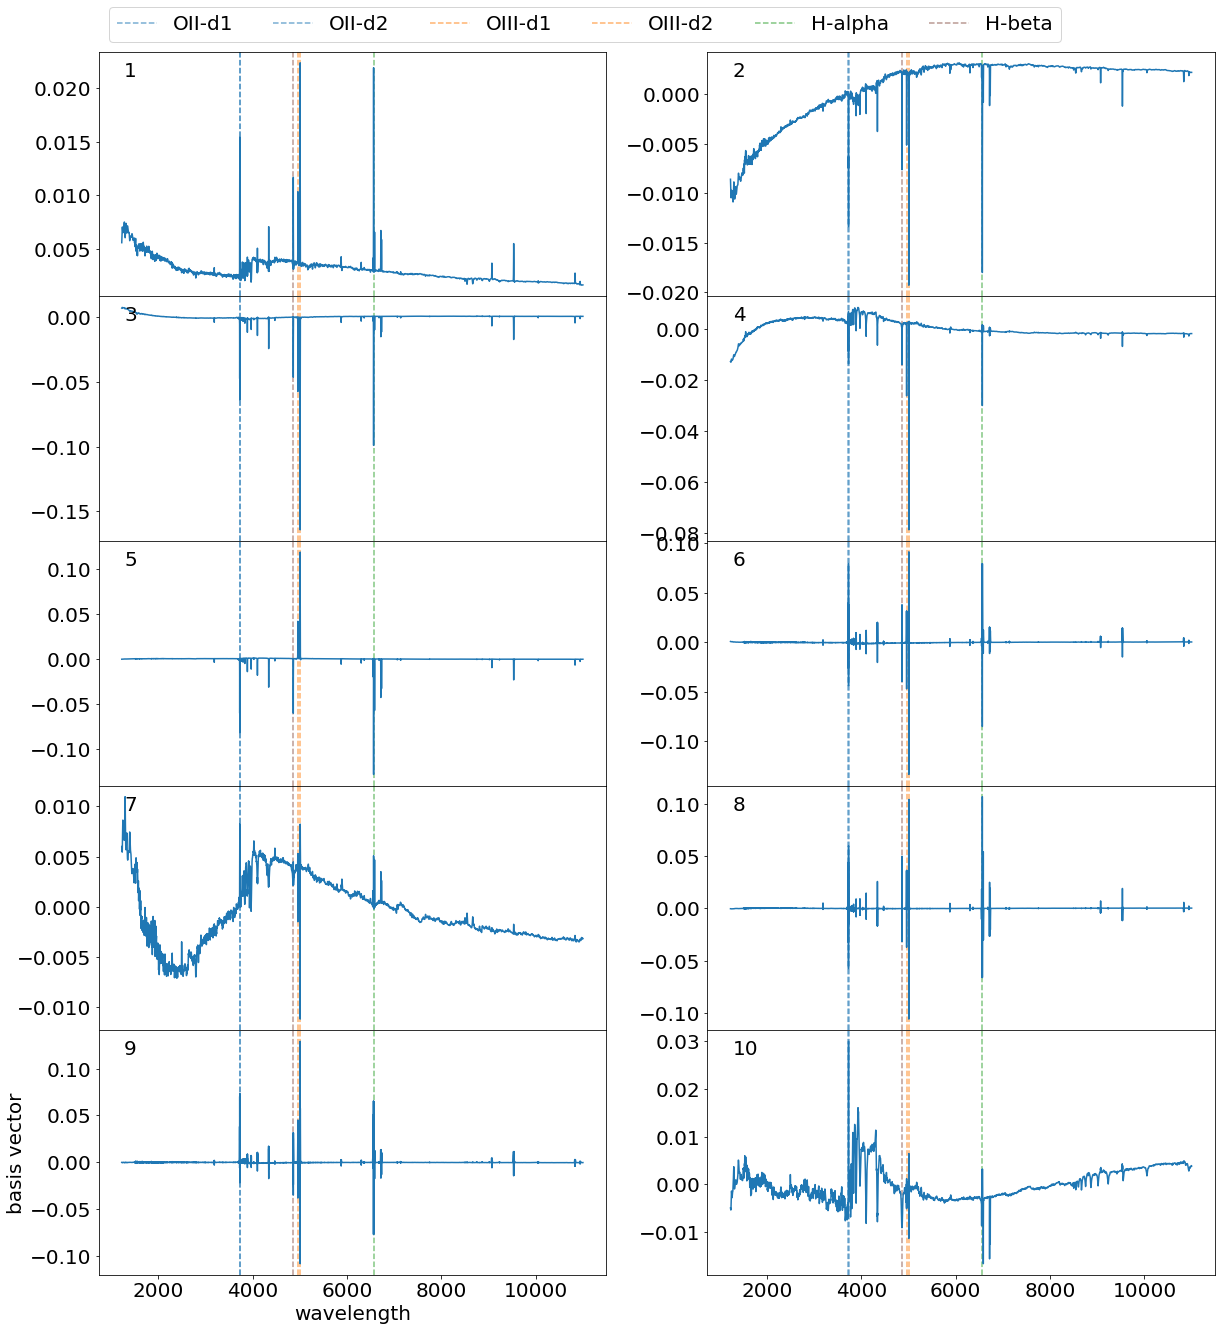

In [10]:
# plot the basis vectors

nrow = int(np.ceil(bv.shape[0]/2))
fig, axs = plt.subplots(nrow, 2, figsize=(20,4.5*nrow), sharex='col')
plt.subplots_adjust(hspace=0)

for i in range(bv.shape[0]):
    # plot a few emission lines
    for e in emls.keys():
        axs[i//2, i%2].axvline(emls[e], label=e, c=eml_colors[e], alpha=0.6, ls='--')
    if i == 0:
        axs[i//2, i%2].legend(ncol=len(emls), bbox_to_anchor=(0, 1), loc='lower left')
    axs[i//2, i%2].plot(wave, bv[i], alpha=1)
    axs[i//2, i%2].text(0.05, 0.9, str(i+1), transform=axs[i//2, i%2].transAxes)
#     axs[i//2, i%2].set_xlim(3700, 3750) # OII
#     axs[i//2, i%2].set_xlim(4940, 5025) # OIII
#     axs[i//2, i%2].set_xlim(4835, 4885) # H-beta
#     axs[i//2, i%2].set_xlim(3500, 6800)

axs[nrow-1, 0].set_xlabel('wavelength')
axs[nrow-1, 0].set_ylabel('basis vector')

plt.savefig('../figures/bv_galaxy.pdf')
plt.show()

In [11]:
# emission lines max z limited by max survey wavelength
max_wavelength = 9900
for e in emls.keys():
    print('{:>8s} : {:.2f}'.format(e, max_wavelength/emls[e]-1))

  OII-d1 : 1.66
  OII-d2 : 1.65
 OIII-d1 : 1.00
 OIII-d2 : 0.98
 H-alpha : 0.51
  H-beta : 1.04


#### Archetype

In [12]:
fx['ARCHETYPE_COEFF'].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   10                                                  
NAXIS2  =                20000                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'ARCHETYPE_COEFF'    / extension name                                 

In [13]:
ac = fx['ARCHETYPE_COEFF'].data
ac.shape

(20000, 10)

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          6.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          4.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   5.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   7.00000000e+00,   1.00000000e+00,
        

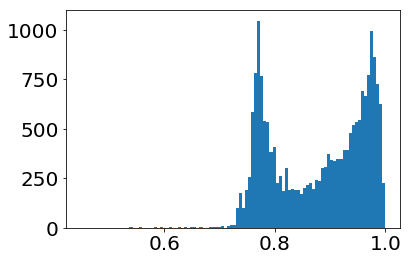

In [14]:
# distribution
plt.hist(ac[:, 0], bins=100)

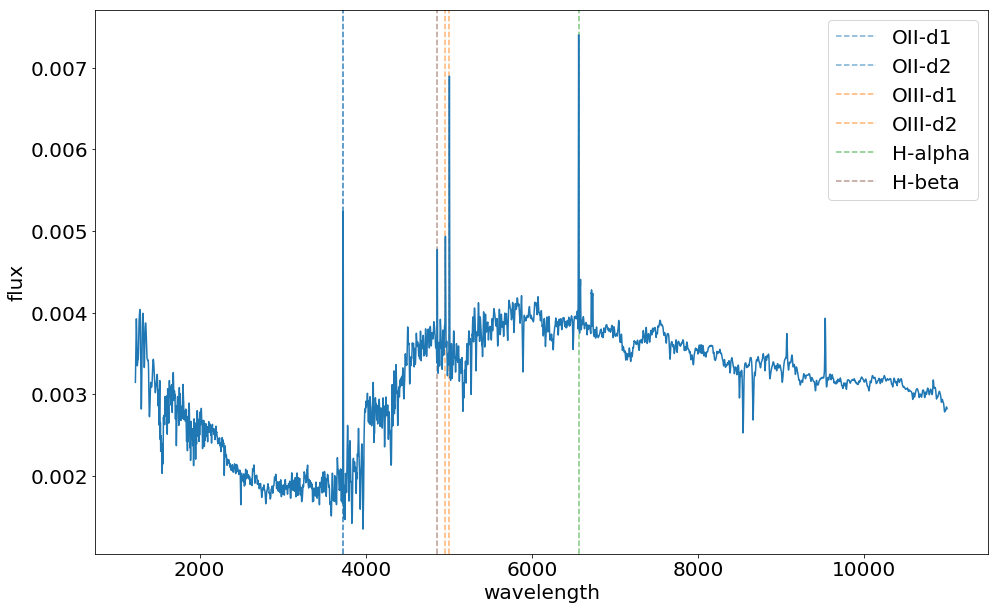

In [15]:
# plot an archetype
ii = 0
flux = bv.T.dot(ac[ii])

fig, (ax) = plt.subplots(1, 1, figsize=(16, 10))

for e in emls.keys():
    ax.axvline(emls[e], label=e, c=eml_colors[e], alpha=0.6, ls='--')
ax.legend()

ax.plot(wave, flux, label='archetype: {:d}'.format(ii))
ax.set_xlabel('wavelength'); ax.set_ylabel('flux')

plt.show()

---